# Loan Data From Prosper
## by Lamia Alsalloom

## Investigation Overview

> Prosper Marketplace is America's first peer-to-peer lending marketplace, with over 7 billion in funded loans. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from 2,000 to 40,000 per loan request. [learn more](https://en.wikipedia.org/wiki/Prosper_Marketplace)

> We are looking into what could affect the status of a loan.

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

##  The change of the borrowing rate over the years

> in this pointplot, we can see that rate of borrowers interest spiked up from 2005 to 2006, after that the rate dropped from 2006 to 2007, then the rate constantly kept increasing for the next few years until it reached its highest in 2011 which after that it kept decreasing constantly.

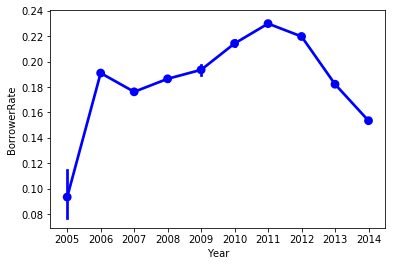

In [6]:
# plotting the pointplot for the Year against BorrowerRate
# Refrence: https://seaborn.pydata.org/generated/seaborn.pointplot.html
# First we will create a column for the year and substring the year from
# ListingCreationDate
loans['Year'] = loans.ListingCreationDate.str.split('-').str[0]
year = loans.Year.value_counts()

sb.pointplot(data=loans, x='Year', y='BorrowerRate', color='b');

## The Effect of CreditGrade over the LoanStatus

> We can see that most of the loans are Completed regardless of the CreditGrade, this is an obvious trend. Maybe we can build off this where we could have a plot of an actual rate..



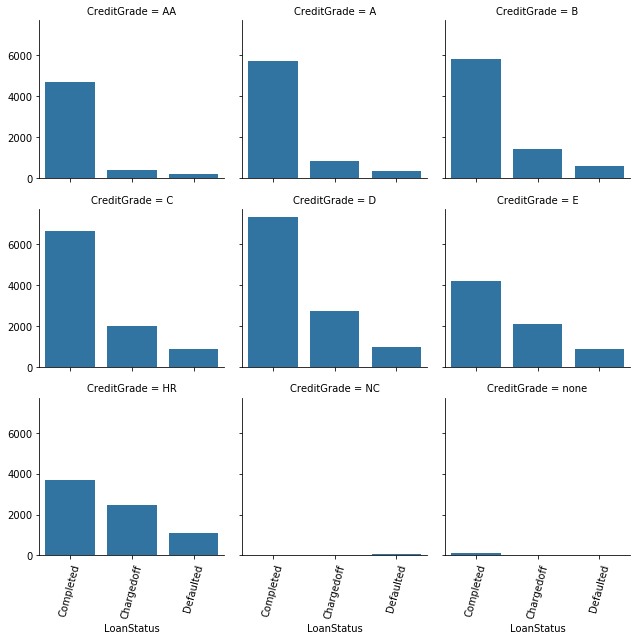

In [7]:
# we can say that LoanStatus in the FinalPaymentInProgress is the same as Complete 
# we can replace them with one another for easy analysis.
loans['LoanStatus'].replace(to_replace = 'FinalPaymentInProgress', value='Completed',inplace=True)

# We will plot to see how the credit grade effects the loan status.
# Refrence: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sb.FacetGrid(data=loans, col = 'CreditGrade',col_wrap=3,col_order=credit_grades)
plt.xticks(rotation=75)
g.map(sb.countplot,"LoanStatus",order=['Completed','Chargedoff','Defaulted']);
g.set_xticklabels(rotation=75)

## How the AvailableBankcardCredit effects that BorrowerRate
> We can see that the more credit one has at the bank the less loans needed and therefor less borrower rate at hand.


Text(0.5, 1.0, 'The Effect of available credit on borrower rate')

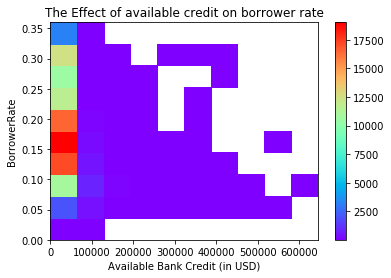

In [8]:
# get rid of null values
loans = loans.loc[loans.AvailableBankcardCredit.notnull()]
# Refrence: https://www.science-emergence.com/Articles/How-to-create-a-2d-histogram-with-matplotlib-/
plt.hist2d(data=loans, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'rainbow', cmin = 0.5);
#show the color bar on the side
plt.colorbar()
#set the title and labels
plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('The Effect of available credit on borrower rate')

### The correlation between LoanStatus and BorrowerAPR
> We can see that completed loans have lower Borrowers APR compared to the distribution of defaulted and cahrgedoff loans. This could mean that maybe there is a correlation between the Borrowers APR and the credit grade.

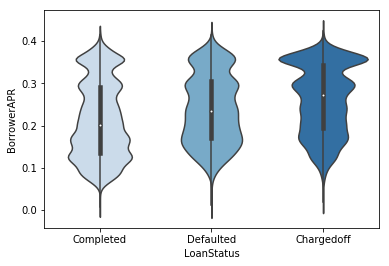

In [9]:
# turn loan status into category
loans['LoanStatus'] = loans['LoanStatus'].astype('category')
# plot viloin
# Refrence: https://seaborn.pydata.org/generated/seaborn.violinplot.html
sb.violinplot(data=loans, x='LoanStatus' ,y = 'BorrowerAPR', order =['Completed','Defaulted','Chargedoff'], palette="Blues");



### Relationship between the BorrowerAPR and CreditGrade. 
> People with higher Credit Grades pay less for a loan and are more likly to pay back the loan, therefor less risky.


Text(0.5, 1.0, 'Change of Mean BorrowerAPR by CreditGrade')

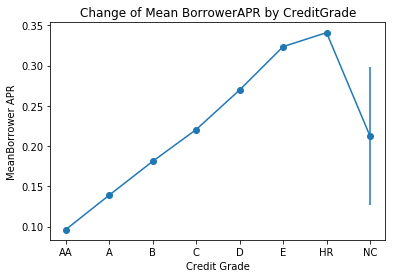

In [10]:
# First, we will generate completion rates for easy analysis.
# we are going to group the data by the CreditGrade then calculate the rate and finally create a df for the generated rates.
group = loans.groupby(['CreditGrade'])
gen_rates = group['LoanStatus'].value_counts() / group['CreditGrade'].count()
gen_rates = gen_rates.reset_index()
#rename the index
gen_rates.rename(columns = {0:'Rate'},inplace=True)
gen_rates2 = gen_rates.copy()
# get rid of none values.
mask = (gen_rates2['CreditGrade'] != 'none')
gen_rates2 = credit_grades.copy()
gen_rates2.remove('none')
# Next we calculate the mean and sem
# get rid of none values.
mask = (loans['CreditGrade'] != 'none')
mean = loans[mask].groupby('CreditGrade')['BorrowerAPR'].mean()
sem = loans[mask].groupby('CreditGrade')['BorrowerAPR'].sem()
# arrange the data
a = []
a_error = []
for i in gen_rates2:
    a.append(mean[i])
    a_error.append(sem[i])
    
# Refrence: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py
# plot error bar
plt.errorbar(y=a, x=gen_rates2, yerr=a_error, fmt='o-')
plt.xlabel('Credit Grade')
plt.ylabel('MeanBorrower APR');
plt.title('Change of Mean BorrowerAPR by CreditGrade')

## Homeowners and Non-Homeowners have a variant BorrowerRate over the years 
>  We can see that the borrowers rate has increased over some years in case of non-homeowners then it kept decreasing in 2010. And when we look at homeowners it kept a steady pace until after 2009 it kept increasing until 2011 then started to decrease.



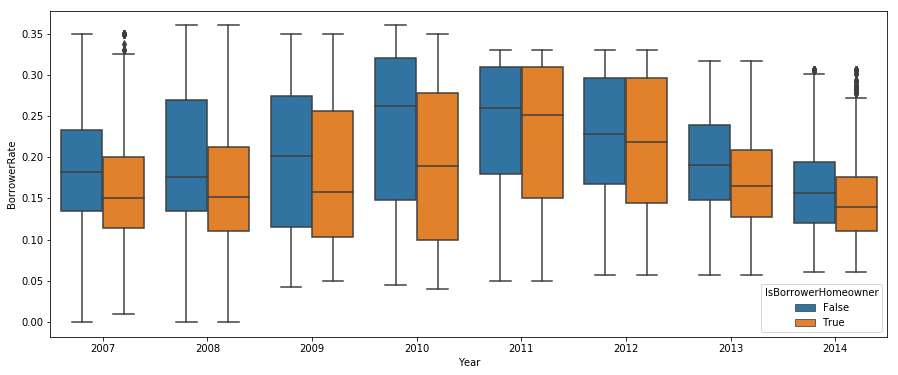

In [11]:
# plots the boxplot 
#Refrence: https://seaborn.pydata.org/generated/seaborn.boxplot.html
g = sb.boxplot(data=loans, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!